In [2]:
### ce code sert à générer le train set et le test set à partir de la base de données. 
# ce n'est pas utile de l'exéxcuter, les dataset finaux sont enregistrés aux format .npy et appelés par le code qui entraîne le mlp

import wfdb
import pandas as pd
from pathlib import Path
import numpy as np
import csv
import random as rd

In [66]:
## on utilise la "MIT-BIH Arrhythmia Database"

#compteurs pour connaître le nombre de battements de chaque type
nb_N = 0
nb_A = 0
nb_V = 0
nb_R = 0
nb_L = 0
dataset = []
labelset = []
for i in range(100, 235): # on parcourt tous les enregistrements (numérotés de 100 à 235 environ)
    if Path(f'mit-bih-arrhythmia-database-1.0.0/{i}.dat').is_file(): #(certains enregistrements n'existent pas)
        rec = wfdb.rdsamp(f'mit-bih-arrhythmia-database-1.0.0/{i}') # les fichiers sont en .dat, on accède aux données avec la librairie "wfdb"
        for j in range (2):
            if (rec[1]['sig_name'][j] == 'MLII'): #on parcourt tous les enregistrements du type "MLII" (correspond à une méthode de positionnement des capteurs),
                #df_rec = pd.DataFrame(rec[0][:,j])
                #df_rec.transpose().to_csv(path_or_buf=f'db_1/{i}rec.csv', index=False, header=False) # j'avais aussi converti une partie des données en csv pour comprendre leur format, on en voit d'autres encore dans le dossier de la database, ceux qui finnissent par 'ann', pour comprendre la structure du type 'annonation' de ce format de fichier
                rec_i = rec[0][:,j][:-1] # contient les signaux bruts (30 minutes)
                location = wfdb.rdann(f'mit-bih-arrhythmia-database-1.0.0/{i}', extension="atr").sample #contient la liste des emplacements des pics
                label = wfdb.rdann(f'mit-bih-arrhythmia-database-1.0.0/{i}', extension="atr").symbol #contient la liste des labels, associée aux pics
                loc_i = location[1:-1]
                label_i = label[1:-1]

                print(i) # pour voir où l'odinateur en est du traitement
                
                for k in range(1,len(label_i)-1): # à chaque pic R
                    if label_i[k] == 'N': # si le battement est de type N
                        nb_N+=1
                        interval = [rec_i[l] for l in range(loc_i[k]-90, loc_i[k]+91)] # on ajoute dans la liste "interval" les 181 points autour du pic (90 avant et après, plus le point du pic)
                        interval.append(loc_i[k] - loc_i[k-1]) #  les intervalles avant 
                        interval.append(loc_i[k+1] - loc_i[k]) # et après le pic (formé par la différence des localisation (location), la valeur de l'intervalle est donc en nombre de points,
                                                                # pour trouver le temps en secondes il aurait fallu diviser par la fréquence d'échantillonnage, ie 360)
                        dataset.append(interval) # on ajoute l'intervalle à la liste dataset
                        labelset.append('N') # et le label à la liste labelset

                    if label_i[k] == 'A': # si le battement est de type A ...
                        nb_A+=1
                        interval = [rec_i[l] for l in range(loc_i[k]-90, loc_i[k]+91)]
                        interval.append(loc_i[k] - loc_i[k-1])
                        interval.append(loc_i[k+1] - loc_i[k])
                        dataset.append(interval)
                        labelset.append('A')
                    if label_i[k] == 'V':
                        nb_V+=1
                        interval = [rec_i[l] for l in range(loc_i[k]-90, loc_i[k]+91)]
                        interval.append(loc_i[k] - loc_i[k-1])
                        interval.append(loc_i[k+1] - loc_i[k])
                        dataset.append(interval)
                        labelset.append('V')
                    if label_i[k] == 'L':
                        nb_L+=1
                        interval = [rec_i[l] for l in range(loc_i[k]-90, loc_i[k]+91)]
                        interval.append(loc_i[k] - loc_i[k-1])
                        interval.append(loc_i[k+1] - loc_i[k])
                        dataset.append(interval)
                        labelset.append('L')
                    if label_i[k] == 'R':
                        nb_R+=1
                        interval = [rec_i[l] for l in range(loc_i[k]-90, loc_i[k]+91)]
                        interval.append(loc_i[k] - loc_i[k-1])
                        interval.append(loc_i[k+1] - loc_i[k])
                        dataset.append(interval)
                        labelset.append('R')

dataseta = np.array(dataset) #conversion en np.array pour travailler dessus et pouvoir enregistrer au format .npy
labelseta= np.array(labelset)

print(nb_N, nb_A, nb_V, nb_R, nb_L) # on affiche le nombre de battements de chaque type -> N : 74691, A : 2541, V : 7120, R : 7248, L : 8066

100
101
103
105
106
107
108
109
111
112
113
114
115
116
117
118
119
121
122
123
124
200
201
202
203
205
207
208
209
210
212
213
214
215
217
219
220
221
222
223
228
230
231
232
233
234
74691 2541 7120 7248 8066


74691 2541 7120 7248 8066

In [70]:
# vérification des données brutes et de la longeur des dataset et labelset

print(dataseta)
print(labelseta)
print(len(dataseta))
print(len(labelseta))

[[-3.05e-01 -3.10e-01 -3.00e-01 ... -4.50e-01  2.93e+02  2.92e+02]
 [-3.30e-01 -3.45e-01 -3.45e-01 ... -4.15e-01  2.92e+02  2.84e+02]
 [-3.75e-01 -3.85e-01 -3.55e-01 ... -3.90e-01  2.84e+02  2.85e+02]
 ...
 [-1.90e-01 -1.90e-01 -1.95e-01 ... -2.05e-01  2.41e+02  2.43e+02]
 [-2.35e-01 -2.35e-01 -2.35e-01 ... -2.55e-01  2.43e+02  2.52e+02]
 [-2.75e-01 -2.70e-01 -2.70e-01 ... -2.80e-01  2.52e+02  2.44e+02]]
['N' 'N' 'N' ... 'N' 'N' 'N']
99666
99666


[[-3.05e-01 -3.10e-01 -3.00e-01 ... -4.50e-01  2.93e+02  2.92e+02]
 [-3.30e-01 -3.45e-01 -3.45e-01 ... -4.15e-01  2.92e+02  2.84e+02]
 [-3.75e-01 -3.85e-01 -3.55e-01 ... -3.90e-01  2.84e+02  2.85e+02]
 ...
 [-1.90e-01 -1.90e-01 -1.95e-01 ... -2.05e-01  2.41e+02  2.43e+02]
 [-2.35e-01 -2.35e-01 -2.35e-01 ... -2.55e-01  2.43e+02  2.52e+02]
 [-2.75e-01 -2.70e-01 -2.70e-01 ... -2.80e-01  2.52e+02  2.44e+02]]
['N' 'N' 'N' ... 'N' 'N' 'N']
99666
99666

In [9]:
# test de l'enregistrement (np.save) et du chargement (np.load) des dataset et labelset
# vérification des données brutes

np.save('dataset.npy', dataset)
np.save('labelset.npy', labelset)

a = np.load('dataset.npy')
b = np.load('labelset.npy')

print(a)
print(b)

[[-3.05e-01 -3.10e-01 -3.00e-01 ... -4.50e-01  2.93e+02  2.92e+02]
 [-3.30e-01 -3.45e-01 -3.45e-01 ... -4.15e-01  2.92e+02  2.84e+02]
 [-3.75e-01 -3.85e-01 -3.55e-01 ... -3.90e-01  2.84e+02  2.85e+02]
 ...
 [-1.90e-01 -1.90e-01 -1.95e-01 ... -2.05e-01  2.41e+02  2.43e+02]
 [-2.35e-01 -2.35e-01 -2.35e-01 ... -2.55e-01  2.43e+02  2.52e+02]
 [-2.75e-01 -2.70e-01 -2.70e-01 ... -2.80e-01  2.52e+02  2.44e+02]]
['N' 'N' 'N' ... 'N' 'N' 'N']


In [35]:
# des train_set (X et y), et test_set (X_val, y_val, parce que val veut dire validation)

from sklearn.utils import shuffle
data = []
label = []

r = 0 # r sera les indices des battements qu'on va choisir randomly
list_r = [r]

n_c = 0 #compteurs pour connaître le nombre de battements déjà choisi de chaque type
a_c = 0
v_c = 0
r_c = 0
l_c = 0
for i in range (10000): # pour le label 'A', on n'a que 2541 battements. donc on choisi d'en garder 2000 de chaque type, 1000 pour le train_set et 1000 pour le test_set
    while ((r in list_r) or ((n_c==2000) and (b[r]=='N')) or ((a_c==2000) and (b[r]=='A')) or ((v_c==2000) and (b[r]=='V')) or ((r_c==2000) and (b[r]=='R')) or ((l_c==2000) and (b[r]=='L'))): #si c'est un battement qu'on a déjà (list_r), ou c'est un battement d'un type dont on a déjà 2000 exemplaires
        r = rd.randint(0, len(a)-1) #on retire aléatoirement un indice
        # à noter : c'est pas très élégant d'aller en chercher 2000 de chaque aléatoirment dans chaque dataset, j'aurais pu les mettre dans des datasets séparés à la base (ça prend plus de temps à la fin, notamment pour chercher
        # les derniers de type A qu'on a pas encore trouvé, mais c'est tout de même assez rapide)
        
    if b[r] == 'N': # aussi 'b' c'est le labelset (voir cell précédente), et 'a' le dataset
        n_c += 1 # on incrément les compteurs de labels
    if b[r] == 'A':
        a_c += 1
    if b[r] == 'V':
        v_c += 1
    if b[r] == 'R':
        r_c += 1
    if b[r] == 'L':
        l_c += 1
    data.append(a[r]) # on ajoute le battement dans la liste data
    label.append(b[r]) # et le label dans la list éponyme
    list_r.append(r) #on ajoute à la liste des battements déjà traités
    print(i) # pour voir où l'odinateur en est du traitement
data, label = shuffle(data, label, random_state=42) #on mélange aléatoirement les listes data et label (de la même façon pour les deux listes), car sinon la liste comporte beaucoup de N au début, et beaucoup de A à la fin
                                                    # en raison du choix aléatoire dans tout le dataset
X = np.array(data[0:5000], dtype=float) #les 5000 premiers sont pour le train set
y = np.array(label[0:5000], dtype=str)
X_val = np.array(data[5000:10000], dtype=float) #er les 5000 suivant sont pour le test set (val = validation)
y_val = np.array(label[5000:10000], dtype=str)
print(n_c) #on affiche les compteurs pour vérifier qu'on en a bien 2000 de chaque label
print(a_c)
print(v_c)
print(r_c)
print(l_c)
print(i)

# note importante : en raison de la méthode, ie une liste de 10 000 battements (2000 de chaque type), mélangée aléatoirment, puis divisée en 2, on n'a pas 1000 battements de chaque type sur les 5000 du trainset et du test set
# mais on en a entre 960 et 1040 environ de chaque type. j'avais vérifié, mais soit dans un autre code de test, soit j'ai supprimé entre-temsp

0
1
2
...
9997
9998
9999
2000
2000
2000
2000
2000
9999
[[-3.05e-01 -3.10e-01 -3.20e-01 ... -2.60e-01  2.57e+02  2.61e+02]
 [-2.30e-01 -2.40e-01 -2.20e-01 ... -2.95e-01  2.98e+02  2.29e+02]
 [-2.15e-01 -2.20e-01 -2.30e-01 ... -2.25e-01  3.22e+02  3.32e+02]
 ...
 [-3.45e-01 -3.35e-01 -3.55e-01 ... -5.50e-02  2.67e+02  2.60e+02]
 [ 5.00e-03  0.00e+00  0.00e+00 ...  1.00e-02  1.52e+02  1.49e+02]
 [-2.25e-01 -2.10e-01 -2.15e-01 ...  0.00e+00  2.50e+02  2.65e+02]]
['N' 'N' 'N' ... 'A' 'A' 'A']
[[-1.90e-01 -2.25e-01 -2.45e-01 ...  7.00e-02  2.03e+02  2.05e+02]
 [-5.75e-01 -5.85e-01 -5.85e-01 ... -1.39e+00  1.77e+02  3.64e+02]
 [-2.45e-01 -2.55e-01 -2.55e-01 ... -1.90e-01  1.93e+02  1.90e+02]
 ...
 [-2.50e-02 -3.50e-02 -5.00e-02 ... -3.50e-01  1.46e+02  3.09e+02]
 [-1.35e-01 -1.35e-01 -1.20e-01 ...  7.00e-02  2.56e+02  2.62e+02]
 [-1.50e-01 -1.45e-01 -1.60e-01 ... -3.95e-01  1.43e+02  1.43e+02]]
['N' 'V' 'N' ... 'A' 'A' 'A']
10000
10000
5000
5000


In [ ]:
# j'avais aussi print les données et quelques compteurts suplémentaires, qu'on voit affichés dans l'output cell ci-dessus mais que j'ai supprimé depuis

In [36]:
# vérification des données brutes
#affichage de la longuer des datasets

print(X)
print(y)
print(X_val)
print(y_val)
print(len(X))
print(len(y))
print(len(X_val))
print(len(y_val))

[[-1.100e-01 -1.050e-01 -1.050e-01 ... -1.800e-01  1.440e+02  1.390e+02]
 [-2.000e-01 -2.100e-01 -2.350e-01 ... -7.700e-01  2.070e+02  3.870e+02]
 [-3.500e-01 -3.750e-01 -3.550e-01 ... -4.750e-01  2.870e+02  2.880e+02]
 ...
 [-7.000e-01 -7.050e-01 -7.150e-01 ... -1.095e+00  2.170e+02  1.470e+02]
 [-1.650e-01 -1.800e-01 -1.700e-01 ...  7.000e-02  3.280e+02  3.340e+02]
 [-1.000e-01 -9.000e-02 -9.500e-02 ...  6.350e-01  1.350e+02  3.090e+02]]
['A' 'V' 'N' ... 'N' 'R' 'V']
[[-1.950e-01 -1.850e-01 -1.800e-01 ... -7.000e-02  2.660e+02  2.610e+02]
 [ 1.850e-01  1.700e-01  1.700e-01 ...  1.800e-01  2.920e+02  3.010e+02]
 [-7.750e-01 -7.850e-01 -7.900e-01 ... -1.155e+00  3.270e+02  3.010e+02]
 ...
 [-7.850e-01 -7.550e-01 -7.400e-01 ... -1.235e+00  2.890e+02  3.110e+02]
 [-1.250e-01 -1.200e-01 -1.350e-01 ... -5.200e-01  2.660e+02  2.630e+02]
 [-7.150e-01 -7.000e-01 -6.900e-01 ... -4.150e-01  1.790e+02  2.490e+02]]
['A' 'N' 'R' ... 'R' 'L' 'V']
5000
5000
5000
5000


[[-1.100e-01 -1.050e-01 -1.050e-01 ... -1.800e-01  1.440e+02  1.390e+02]
 [-2.000e-01 -2.100e-01 -2.350e-01 ... -7.700e-01  2.070e+02  3.870e+02]
 [-3.500e-01 -3.750e-01 -3.550e-01 ... -4.750e-01  2.870e+02  2.880e+02]
 ...
 [-7.000e-01 -7.050e-01 -7.150e-01 ... -1.095e+00  2.170e+02  1.470e+02]
 [-1.650e-01 -1.800e-01 -1.700e-01 ...  7.000e-02  3.280e+02  3.340e+02]
 [-1.000e-01 -9.000e-02 -9.500e-02 ...  6.350e-01  1.350e+02  3.090e+02]]
['A' 'V' 'N' ... 'N' 'R' 'V']
[[-1.950e-01 -1.850e-01 -1.800e-01 ... -7.000e-02  2.660e+02  2.610e+02]
 [ 1.850e-01  1.700e-01  1.700e-01 ...  1.800e-01  2.920e+02  3.010e+02]
 [-7.750e-01 -7.850e-01 -7.900e-01 ... -1.155e+00  3.270e+02  3.010e+02]
 ...
 [-7.850e-01 -7.550e-01 -7.400e-01 ... -1.235e+00  2.890e+02  3.110e+02]
 [-1.250e-01 -1.200e-01 -1.350e-01 ... -5.200e-01  2.660e+02  2.630e+02]
 [-7.150e-01 -7.000e-01 -6.900e-01 ... -4.150e-01  1.790e+02  2.490e+02]]
['A' 'N' 'R' ... 'R' 'L' 'V']


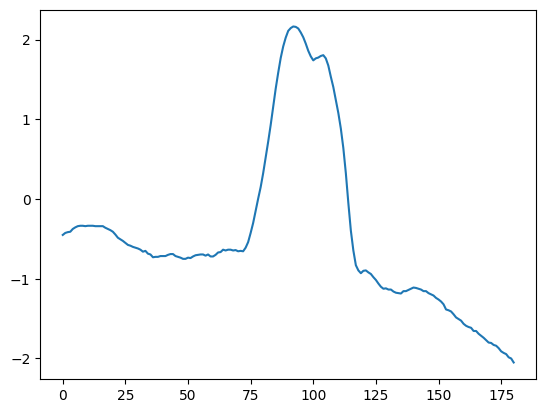

V


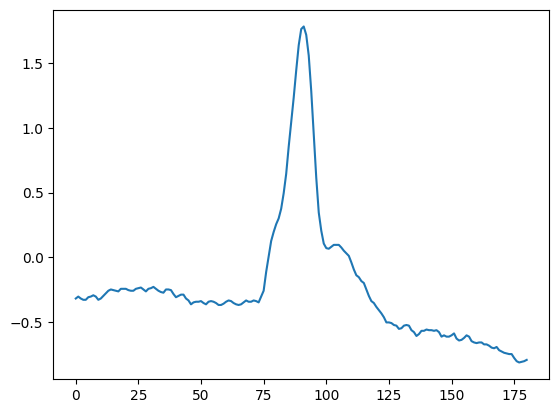

L


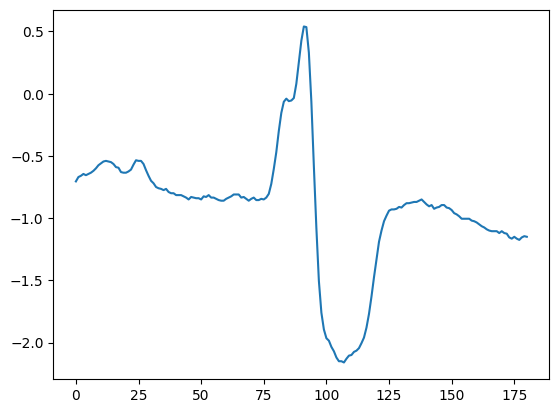

R


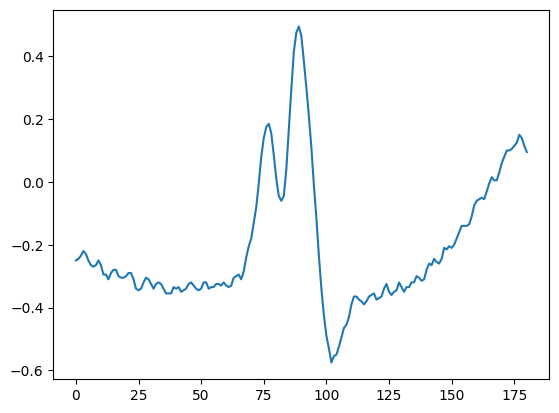

L


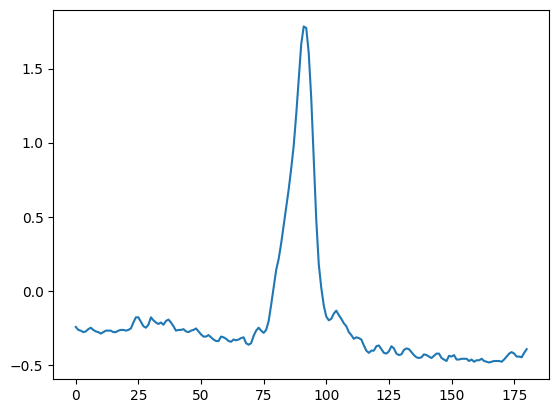

L


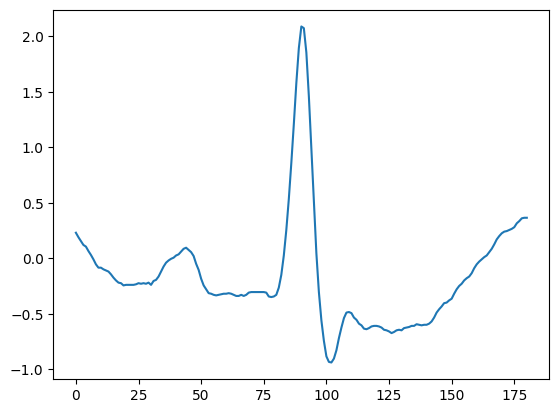

N


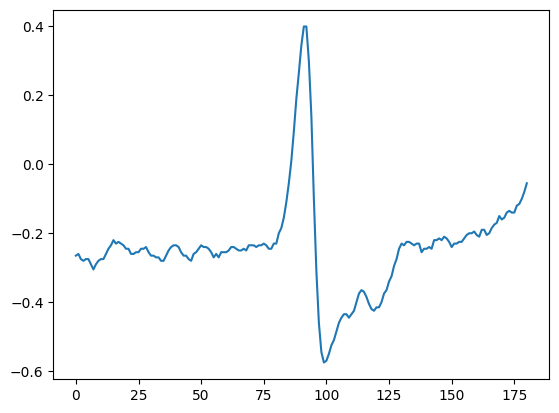

A


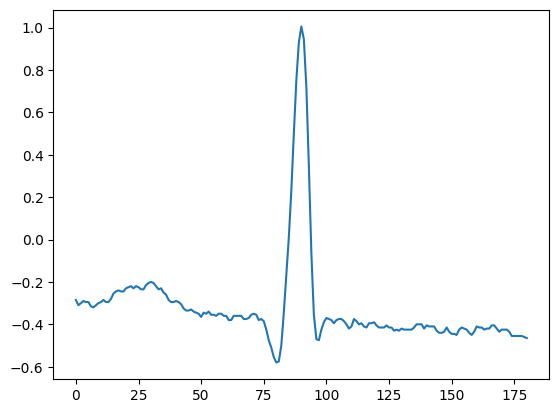

A


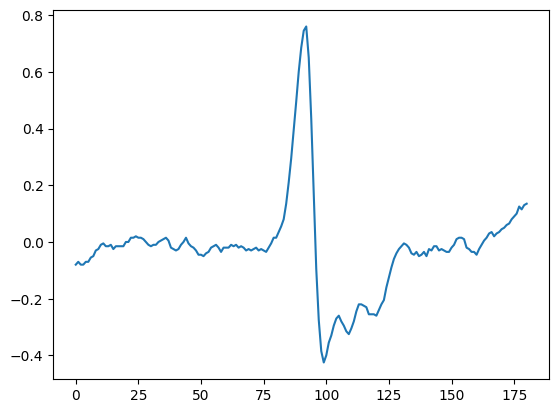

A


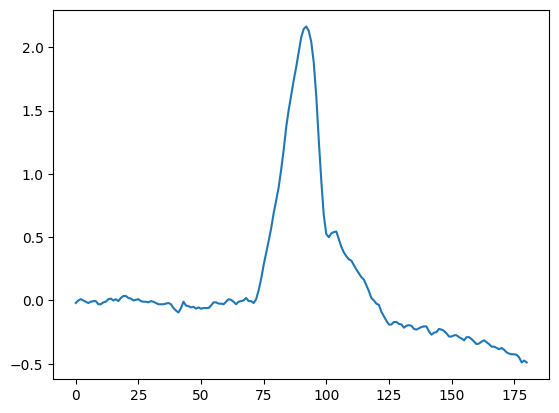

L


In [6]:
# test de l'enregistrement (np.save) et du chargement (np.load) des train_set (X et y), et test_set (X_val, y_val, parce que val veut dire validation)
# vérification des données brutes, et affichage de plusieurs avec le label correspondant

np.save('X.npy', X)
np.save('y.npy', y)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)

X = np.load('X.npy')
y = np.load('y.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')

print(X)
print(y)
print(X_val)
print(y_val)

import matplotlib.pyplot as plt

for i in range(5):
    index = rd.randint(0,len(X))
    plt.plot(X[index][:-2])
    plt.show()
    print(y[index])
for i in range(5):
    index = rd.randint(0,len(X))
    plt.plot(X_val[index][:-2])
    plt.show()
    print(y_val[index])